## Dropout

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


#### 2. Build the model

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [5]:
# Dropout을 적용하며 layer마다 살려줄 node의 비율을 지정합니다.
# 이 때에도 placeholder를 사용해야 합니다.

keep_prob = tf.placeholder(tf.float32)

In [6]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob) # (Dropout을 적용할 layer, 살릴 비율)

In [7]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob) # Dropout을 적용할 layer & 살릴 비율

In [8]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

#### 3. Set the criterion

In [9]:
cost = tf.losses.softmax_cross_entropy(Y, model) 
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#### 4. Train the model

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [11]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
print(total_batch)

550


In [13]:
# from tqdm import trange, tqdm_notebook
# for epoch in tqdm_notebook(range(15)):

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8}) # 살릴 비율 지정, node 중 80%만 유지하고 20%를 train 시마다 off
        total_cost += cost_val

    print('Epoch: {}'.format(epoch+1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('Learning process is completed!')

Epoch: 1 Avg. cost = 0.432
Epoch: 2 Avg. cost = 0.165
Epoch: 3 Avg. cost = 0.117
Epoch: 4 Avg. cost = 0.090
Epoch: 5 Avg. cost = 0.074
Epoch: 6 Avg. cost = 0.064
Epoch: 7 Avg. cost = 0.053
Epoch: 8 Avg. cost = 0.047
Epoch: 9 Avg. cost = 0.042
Epoch: 10 Avg. cost = 0.038
Epoch: 11 Avg. cost = 0.034
Epoch: 12 Avg. cost = 0.030
Epoch: 13 Avg. cost = 0.029
Epoch: 14 Avg. cost = 0.027
Epoch: 15 Avg. cost = 0.027
Learning process is completed!


#### 5. Test the model

In [14]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [16]:
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1})) # 살릴 비율 지정, 정확도를 측정하는 Test 단계에서는 전체 Node를 살려줘야 합니다.

정확도: 0.9817


#### + Appendix. Save the predicted values

In [17]:
# 모델의 예측값을 labels에 저장
labels = sess.run(tf.argmax(model, 1),
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1}) 
print(labels)

[7 2 1 ... 4 5 6]


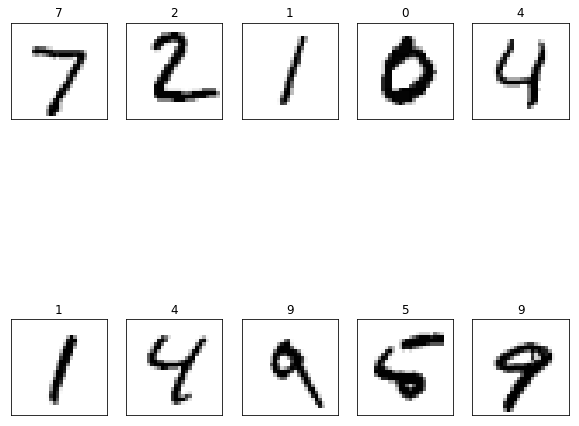

In [22]:
# fig = plt.figure(figsize=(10, 10))

# for i in range(10):
#     subplot = fig.add_subplot(2, 5, i + 1)
#     subplot.set_xticks([])
#     subplot.set_yticks([])
#     subplot.set_title('%d' % labels[i])
#     subplot.imshow(mnist.test.images[i].reshape((28, 28)),
#                    cmap=plt.cm.gray_r)

# plt.show() # 상단의 번호가 예측된 숫자, 아래의 이미지가 실제 데이터(이미지 내 숫자)